### Taller 3: análisis de redes sociales. - TERCERA PARTE

In [1]:

!pip install -U scikit-learn

In [2]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

<h4 align="left"> Loading labeled tweets. </h4> 

In [6]:

tweets_df = pd.read_csv('./data/medellin_tweets_labeled600FINAL.csv', sep = ',')

In [7]:
tweets_df.head(40)

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0
5,@Don_Patriota1: Me acabo d enterar que al Sena...,0.0
6,@JoseMejiaCD: Abramos hilo de la abucheada tan...,0.0
7,@Leo_uribista: ‼️Hermoso…así fue tratado en su...,1.0
8,"@Nicols03804032: Hoy en el centro de Medellín,...",1.0
9,Me parece súper bien el rechazo a Petro en #Me...,0.0


In [8]:
tweets_df['sentiment'].value_counts(dropna = False)

NaN    3893
0.0    1249
1.0     894
Name: sentiment, dtype: int64

In [9]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.644964
0.0    0.206925
1.0    0.148111
Name: sentiment, dtype: float64

<h4 align="left"> Leaving out unlabeled texts, this data is not useful for training or validating a supervised model.</h4> 

In [10]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [11]:
tweets_labeled_df.shape

(2143, 2)

In [12]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [13]:
tweets_nolabeled_df.shape

(3893, 2)

<h4 align="left"> Splitting train and test datasets. </h4> 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [15]:
X_train.shape

(1714,)

In [16]:
pd.Series(y_train).value_counts(normalize = True)

0.0    0.582847
1.0    0.417153
Name: sentiment, dtype: float64

In [17]:
X_test.shape

(429,)

In [18]:
pd.Series(y_test).value_counts(normalize = True)

0.0    0.582751
1.0    0.417249
Name: sentiment, dtype: float64

<h4 align="left"> Vectorizing texts. </h4> 

In [19]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [20]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [21]:
X_bow = bow.fit_transform(X_train)

In [22]:
X_tfidf = tfidf.fit_transform(X_train)

<h4 align="left"> Training and evaluating a model using BOW. </h4> 

<h4>Bag of Words</h4>
                <img src="./imgs/bow.png" width="500" height="40" align="left" />

In [23]:
logistic_model = LogisticRegression(random_state = 2)

In [24]:
logistic_model.fit(X_bow, y_train)

LogisticRegression(random_state=2)

In [25]:
y_train_bow_predict = logistic_model.predict(X_bow)
y_test_bow_predict = logistic_model.predict(bow.transform(X_test))

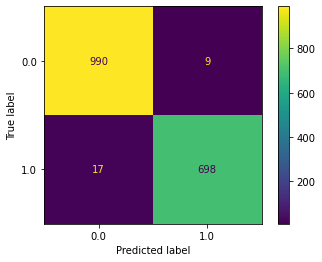

In [26]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

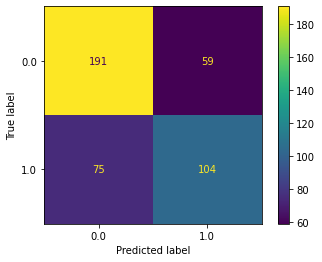

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [28]:
print('Precision:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precision: 0.6380368098159509
Recall: 0.5810055865921788
F1: 0.6081871345029239


<h4 align="left"> Training and evaluating a model using TF-IDF. </h4> 

<h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" width="400" height="40" align="left" />

In [29]:
logistic_model = LogisticRegression(random_state = 2)

In [30]:
logistic_model.fit(X_tfidf, y_train)

LogisticRegression(random_state=2)

In [31]:
y_train_tfidf_predict = logistic_model.predict(X_tfidf)
y_test_tfidf_predict = logistic_model.predict(bow.transform(X_test))

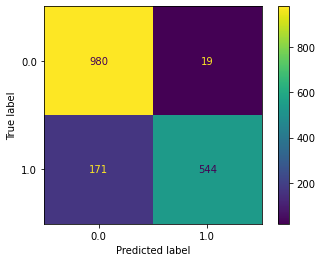

In [32]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

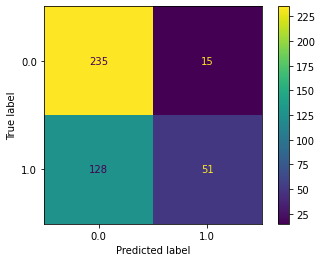

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [34]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precision: 0.7727272727272727
Recall: 0.2849162011173184
F1: 0.41632653061224484


### Supervised machine learning using diferent models.

### Training using SVC.

In [35]:
svm = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [36]:
X_svm = svm.fit_transform(X_train)

<h4 align="left"> ■ Kernel = poly.</h4> 

In [37]:
support_vector_machines = SVC(kernel = 'poly')

In [38]:
support_vector_machines.fit(X_svm, y_train)

SVC(kernel='poly')

In [39]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

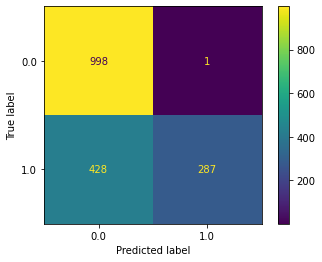

In [40]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)


<h4 align="left"> ■ Kernel = rbf.</h4> 



In [41]:
support_vector_machines = SVC(kernel = 'rbf')

In [42]:
support_vector_machines.fit(X_svm, y_train)

SVC()

In [43]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

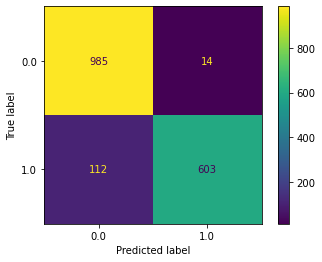

In [44]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

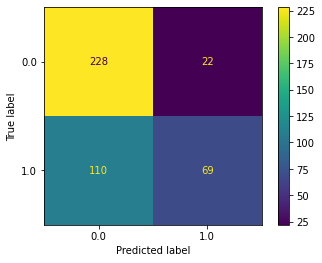

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

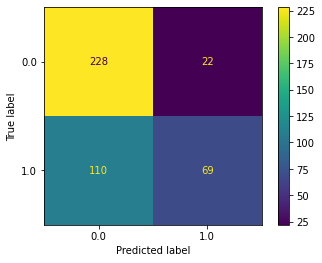

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

 <h4 align="left"> ■ Degree = 2.</h4> 
 

In [47]:
support_vector_machines = SVC(degree = 2)

In [48]:
support_vector_machines.fit(X_svm, y_train)

SVC(degree=2)

In [49]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

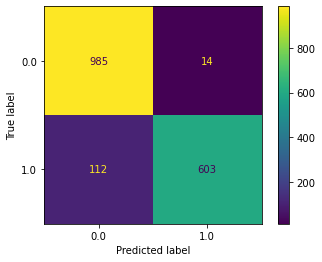

In [50]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

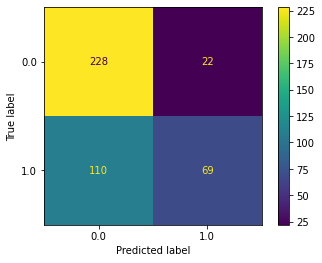

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

In [52]:
print('Precision:', precision_score(y_test, y_test_svm_predict))
print('Recall:', recall_score(y_test, y_test_svm_predict))
print('F1:', f1_score(y_test, y_test_svm_predict))

Precision: 0.7582417582417582
Recall: 0.3854748603351955
F1: 0.5111111111111111


 <h4 align="left"> Kernel = poly.</h4> 
 
 degree:3

In [53]:
support_vector_machines = SVC(degree = 3)

In [54]:
support_vector_machines.fit(X_svm, y_train)

SVC()

In [55]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

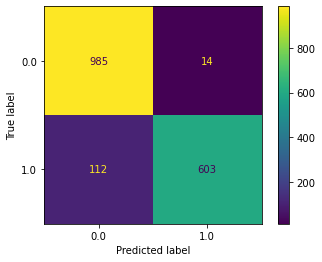

In [57]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

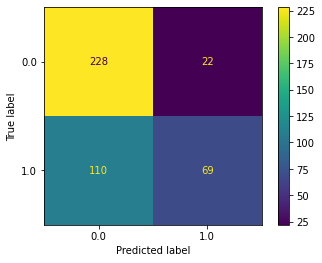

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

In [59]:
print('Precision:', precision_score(y_test, y_test_svm_predict))
print('Recall:', recall_score(y_test, y_test_svm_predict))
print('F1:', f1_score(y_test, y_test_svm_predict))

Precision: 0.7582417582417582
Recall: 0.3854748603351955
F1: 0.5111111111111111


 <h4 align="left"> ■ Degree = 4.</h4> 


In [60]:
support_vector_machines = SVC(degree = 4)

In [61]:
support_vector_machines.fit(X_svm, y_train)

SVC(degree=4)

In [62]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

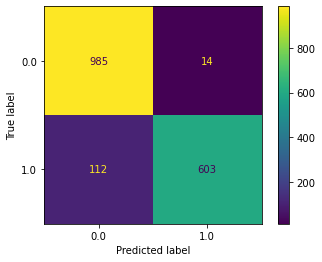

In [63]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

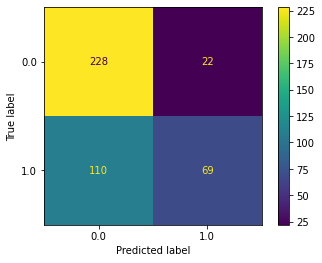

In [64]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

In [65]:
print('Precision:', precision_score(y_test, y_test_svm_predict))
print('Recall:', recall_score(y_test, y_test_svm_predict))
print('F1:', f1_score(y_test, y_test_svm_predict))

Precision: 0.7582417582417582
Recall: 0.3854748603351955
F1: 0.5111111111111111


 <h4 align="left"> ■ Gamma = scale.</h4> 


In [66]:
support_vector_machines = SVC(gamma = 'scale')

In [67]:
support_vector_machines.fit(X_svm, y_train)

SVC()

In [68]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

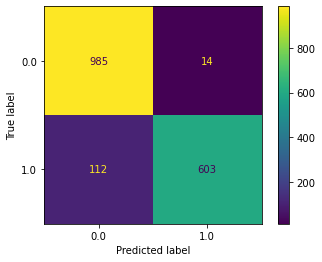

In [69]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

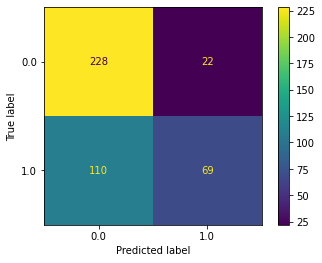

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

In [71]:
print('Precision:', precision_score(y_test, y_test_svm_predict))
print('Recall:', recall_score(y_test, y_test_svm_predict))
print('F1:', f1_score(y_test, y_test_svm_predict))

Precision: 0.7582417582417582
Recall: 0.3854748603351955
F1: 0.5111111111111111


 <h4 align="left"> ■ Gamma = auto.</h4> 




In [72]:
support_vector_machines = SVC(gamma = 'auto')

In [73]:
support_vector_machines.fit(X_svm, y_train)

SVC(gamma='auto')

In [74]:
y_train_svm_predict = support_vector_machines.predict(X_svm)
y_test_svm_predict = support_vector_machines.predict(svm.transform(X_test))

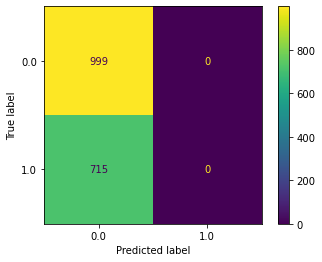

In [75]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

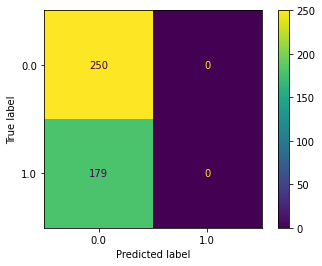

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

### Training using KNeighborsClassifier.
N_neighbors = 3.

In [80]:
Neighbors = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [81]:
X_Neighbors = Neighbors.fit_transform(X_train)

In [82]:
K_Neighbors_Classifier = KNeighborsClassifier(n_neighbors=3)

In [83]:
K_Neighbors_Classifier.fit(X_Neighbors, y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_train_Neighbors_predict = K_Neighbors_Classifier.predict(X_Neighbors)
y_test_Neighbors_predict = K_Neighbors_Classifier.predict(Neighbors.transform(X_test))

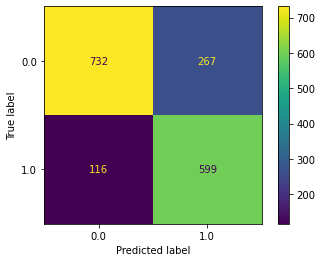

In [85]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_Neighbors_predict)

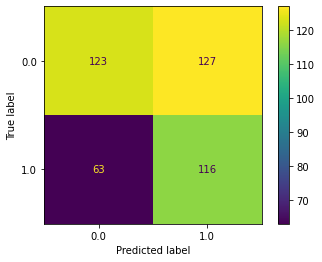

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_Neighbors_predict)

In [87]:
print('Precision:', precision_score(y_test, y_test_Neighbors_predict))
print('Recall:', recall_score(y_test, y_test_Neighbors_predict))
print('F1:', f1_score(y_test, y_test_Neighbors_predict))

Precision: 0.4773662551440329
Recall: 0.6480446927374302
F1: 0.5497630331753554


 <h4 align="left"> ■ N_neighbors = 5.</h4> 



In [88]:
Neighbors = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [89]:
X_Neighbors = Neighbors.fit_transform(X_train)

In [90]:
K_Neighbors_Classifier = KNeighborsClassifier(n_neighbors=5)

In [91]:
K_Neighbors_Classifier.fit(X_Neighbors, y_train)

KNeighborsClassifier()

In [92]:
y_train_Neighbors_predict = K_Neighbors_Classifier.predict(X_Neighbors)
y_test_Neighbors_predict = K_Neighbors_Classifier.predict(Neighbors.transform(X_test))

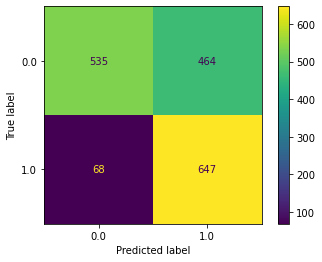

In [93]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_Neighbors_predict)

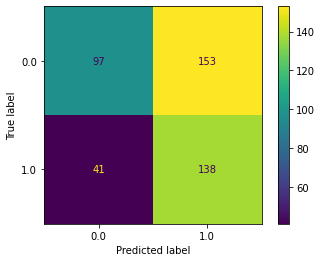

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_Neighbors_predict)

In [95]:
print('Precision:', precision_score(y_test, y_test_Neighbors_predict))
print('Recall:', recall_score(y_test, y_test_Neighbors_predict))
print('F1:', f1_score(y_test, y_test_Neighbors_predict))

Precision: 0.4742268041237113
Recall: 0.770949720670391
F1: 0.5872340425531916


 <h4 align="left"> ■ N_neighbors = 7.</h4> 




In [96]:
Neighbors = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [97]:
X_Neighbors = Neighbors.fit_transform(X_train)

In [98]:
K_Neighbors_Classifier = KNeighborsClassifier(n_neighbors=7)

In [99]:
K_Neighbors_Classifier.fit(X_Neighbors, y_train)

KNeighborsClassifier(n_neighbors=7)

In [100]:
y_train_Neighbors_predict = K_Neighbors_Classifier.predict(X_Neighbors)
y_test_Neighbors_predict = K_Neighbors_Classifier.predict(Neighbors.transform(X_test))

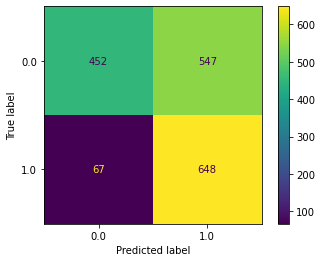

In [101]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_Neighbors_predict)

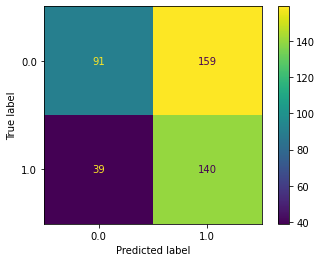

In [102]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_Neighbors_predict)

In [103]:
print('Precision:', precision_score(y_test, y_test_Neighbors_predict))
print('Recall:', recall_score(y_test, y_test_Neighbors_predict))
print('F1:', f1_score(y_test, y_test_Neighbors_predict))

Precision: 0.4682274247491639
Recall: 0.7821229050279329
F1: 0.5857740585774058


### Training using Multinomial Naive-Bayes. 

In [104]:
Naive_Bayes = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [105]:
X_Naive_Bayes = Naive_Bayes.fit_transform(X_train)

In [106]:
gnb = MultinomialNB()

In [107]:
gnb.fit(X_Naive_Bayes.toarray(), y_train)

MultinomialNB()

In [108]:
y_train_gnb_predict = gnb.predict(X_Naive_Bayes.toarray())

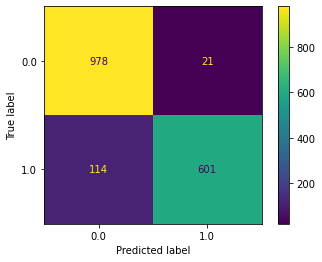

In [109]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_gnb_predict)

In [110]:
print('Precision:', precision_score(y_train, y_train_gnb_predict))
print('Recall:', recall_score(y_train, y_train_gnb_predict))
print('F1:', f1_score(y_train, y_train_gnb_predict))

Precision: 0.9662379421221865
Recall: 0.8405594405594405
F1: 0.8990276738967838


### Training using DecisionTree.
Max_Depth =3


In [111]:
dt = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [112]:
X_dt = dt.fit_transform(X_train)

In [113]:
DecisionTree = DecisionTreeClassifier(max_depth = 3)

In [114]:
DecisionTree.fit(X_svm, y_train)

DecisionTreeClassifier(max_depth=3)

In [115]:
y_train_dt_predict = DecisionTree.predict(X_dt)
y_test_dt_predict = DecisionTree.predict(dt.transform(X_test))

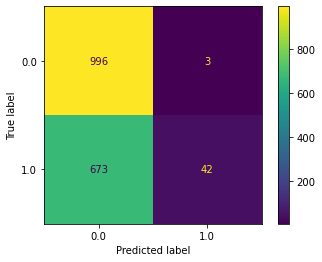

In [117]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_dt_predict)

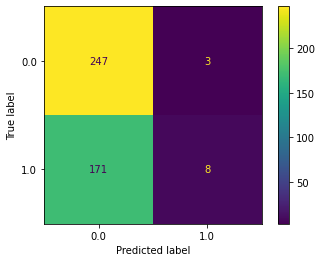

In [118]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_dt_predict)

In [119]:
print('Precision:', precision_score(y_test, y_test_dt_predict))
print('Recall:', recall_score(y_test, y_test_dt_predict))
print('F1:', f1_score(y_test, y_test_dt_predict))

Precision: 0.7272727272727273
Recall: 0.0446927374301676
F1: 0.08421052631578949


 <h4 align="left"> ■ Max_depth = 6.</h4> 





In [120]:
dt = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [121]:
X_dt = dt.fit_transform(X_train)

In [122]:
DecisionTree = DecisionTreeClassifier(max_depth = 6)

In [123]:
DecisionTree.fit(X_svm, y_train)

DecisionTreeClassifier(max_depth=6)

In [124]:
y_train_dt_predict = DecisionTree.predict(X_dt)
y_test_dt_predict = DecisionTree.predict(dt.transform(X_test))

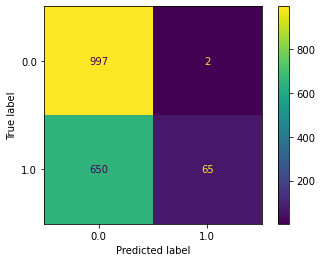

In [125]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_dt_predict)

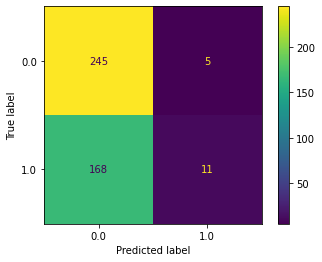

In [126]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_dt_predict)

In [127]:
print('Precision:', precision_score(y_test, y_test_dt_predict))
print('Recall:', recall_score(y_test, y_test_dt_predict))
print('F1:', f1_score(y_test, y_test_dt_predict))

Precision: 0.6875
Recall: 0.061452513966480445
F1: 0.11282051282051282



 <h4 align="left"> ■ Max_depth = 9.</h4> 




In [128]:
dt = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [129]:
X_dt = dt.fit_transform(X_train)

In [130]:
DecisionTree = DecisionTreeClassifier(max_depth = 9)

In [131]:
DecisionTree.fit(X_svm, y_train)

DecisionTreeClassifier(max_depth=9)

In [132]:
y_train_dt_predict = DecisionTree.predict(X_dt)
y_test_dt_predict = DecisionTree.predict(dt.transform(X_test))

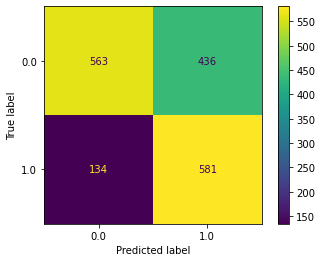

In [133]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_dt_predict)

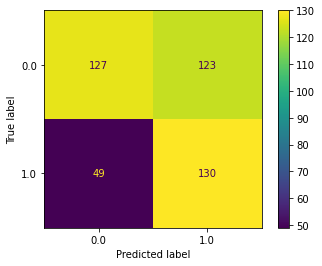

In [134]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_dt_predict)

In [135]:
print('Precision:', precision_score(y_test, y_test_dt_predict))
print('Recall:', recall_score(y_test, y_test_dt_predict))
print('F1:', f1_score(y_test, y_test_dt_predict))

Precision: 0.5138339920948617
Recall: 0.7262569832402235
F1: 0.601851851851852


#### Training using RandomForest.
Max_depth = 3

In [136]:
rf = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [137]:
X_rf = rf.fit_transform(X_train)

In [138]:
RandomForest = RandomForestClassifier(max_depth = 3)

In [139]:
RandomForest.fit(X_svm, y_train)

RandomForestClassifier(max_depth=3)

In [140]:
y_train_rf_predict = RandomForest.predict(X_rf)
y_test_rf_predict = RandomForest.predict(rf.transform(X_test))

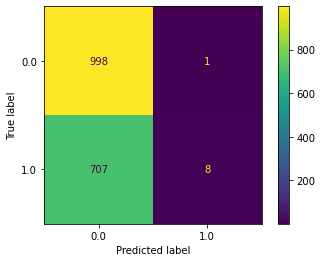

In [142]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf_predict)

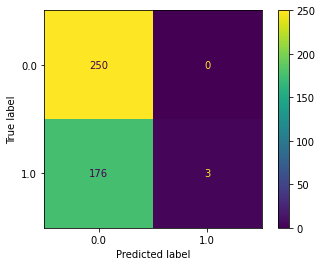

In [143]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf_predict)

In [144]:
print('Precision:', precision_score(y_test, y_test_rf_predict))
print('Recall:', recall_score(y_test, y_test_rf_predict))
print('F1:', f1_score(y_test, y_test_rf_predict))

Precision: 1.0
Recall: 0.01675977653631285
F1: 0.03296703296703297


 <h4 align="left"> ■ Max_depth = 6.</h4> 



In [145]:
rf = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [146]:
X_rf = rf.fit_transform(X_train)

In [147]:
RandomForest = RandomForestClassifier(max_depth = 6)

In [148]:
RandomForest.fit(X_svm, y_train)

RandomForestClassifier(max_depth=6)

In [149]:
y_train_rf_predict = RandomForest.predict(X_rf)
y_test_rf_predict = RandomForest.predict(rf.transform(X_test))

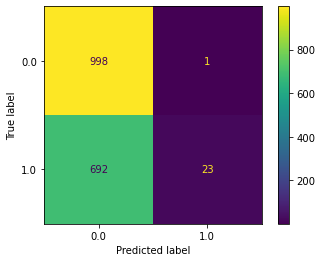

In [150]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf_predict)

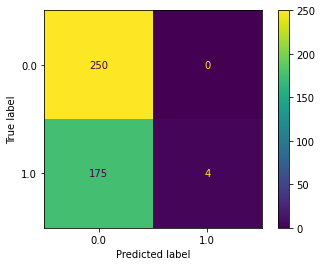

In [151]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf_predict)

In [152]:
print('Precision:', precision_score(y_test, y_test_rf_predict))
print('Recall:', recall_score(y_test, y_test_rf_predict))
print('F1:', f1_score(y_test, y_test_rf_predict))

Precision: 1.0
Recall: 0.0223463687150838
F1: 0.04371584699453552


 <h4 align="left"> ■ Max_depth = 9.</h4> 


In [153]:
rf = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [154]:
X_rf = rf.fit_transform(X_train)

In [155]:
RandomForest = RandomForestClassifier(max_depth = 9)

In [156]:
RandomForest.fit(X_svm, y_train)

RandomForestClassifier(max_depth=9)

In [157]:
y_train_rf_predict = RandomForest.predict(X_rf)
y_test_rf_predict = RandomForest.predict(rf.transform(X_test))

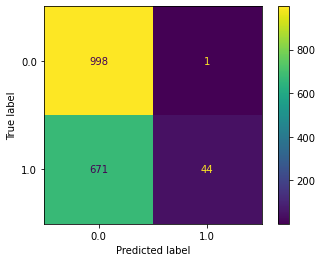

In [159]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf_predict)

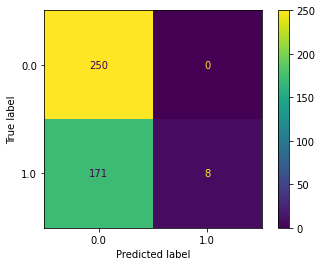

In [160]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf_predict)

In [161]:
print('Precision:', precision_score(y_test, y_test_rf_predict))
print('Recall:', recall_score(y_test, y_test_rf_predict))
print('F1:', f1_score(y_test, y_test_rf_predict))

Precision: 1.0
Recall: 0.0446927374301676
F1: 0.08556149732620322


 <h4 align="left"> ■ N_estimators = 100.</h4> 




In [162]:
rf = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [163]:
X_rf = rf.fit_transform(X_train)

In [164]:
RandomForest = RandomForestClassifier(n_estimators = 100)

In [165]:
RandomForest.fit(X_svm, y_train)

RandomForestClassifier()

In [166]:
y_train_rf_predict = RandomForest.predict(X_rf)
y_test_rf_predict = RandomForest.predict(rf.transform(X_test))

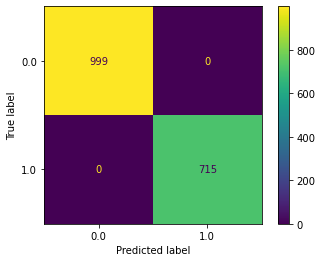

In [167]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf_predict)

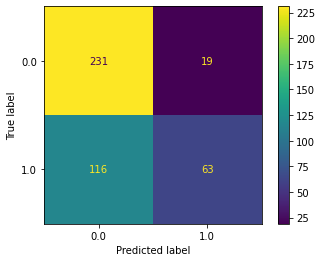

In [168]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf_predict)

In [169]:
print('Precision:', precision_score(y_test, y_test_rf_predict))
print('Recall:', recall_score(y_test, y_test_rf_predict))
print('F1:', f1_score(y_test, y_test_rf_predict))

Precision: 0.7682926829268293
Recall: 0.35195530726256985
F1: 0.48275862068965525


 <h4 align="left"> ■ N_estimators = 200.</h4> 




In [170]:
rf = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [171]:
X_rf = rf.fit_transform(X_train)

In [172]:
RandomForest = RandomForestClassifier(n_estimators = 200)

In [173]:
RandomForest.fit(X_svm, y_train)

RandomForestClassifier(n_estimators=200)

In [175]:
y_train_rf_predict = RandomForest.predict(X_rf)
y_test_rf_predict = RandomForest.predict(rf.transform(X_test))

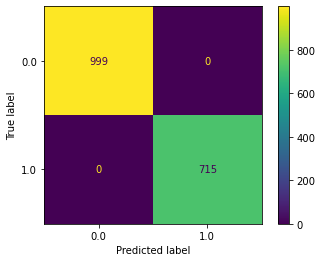

In [176]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf_predict)

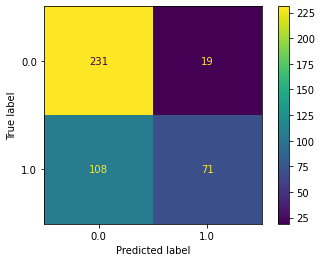

In [177]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf_predict)

In [178]:
print('Precision:', precision_score(y_test, y_test_rf_predict))
print('Recall:', recall_score(y_test, y_test_rf_predict))
print('F1:', f1_score(y_test, y_test_rf_predict))

Precision: 0.7888888888888889
Recall: 0.39664804469273746
F1: 0.5278810408921933


 <h4 align="left"> ■ N_estimators = 300.</h4> 




In [179]:
rf = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [180]:
X_rf = rf.fit_transform(X_train)

In [181]:
RandomForest = RandomForestClassifier(n_estimators = 300)

In [182]:
RandomForest.fit(X_svm, y_train)

RandomForestClassifier(n_estimators=300)

In [183]:
y_train_rf_predict = RandomForest.predict(X_rf)
y_test_rf_predict = RandomForest.predict(rf.transform(X_test))

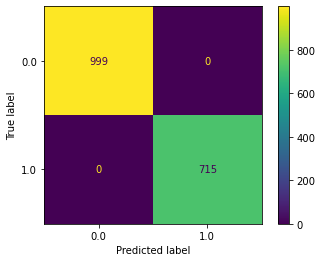

In [184]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf_predict)

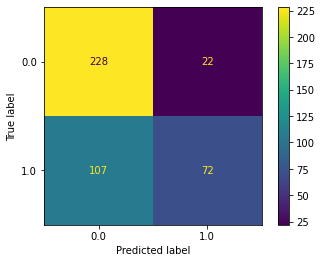

In [185]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf_predict)

In [186]:
print('Precision:', precision_score(y_test, y_test_rf_predict))
print('Recall:', recall_score(y_test, y_test_rf_predict))
print('F1:', f1_score(y_test, y_test_rf_predict))

Precision: 0.7659574468085106
Recall: 0.4022346368715084
F1: 0.5274725274725275


### Training using Neuronal Network.

 <h4 align="left"> ■ Hidden_layer_sizes = (100).</h4> 




In [187]:
nn = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [188]:
X_nn = nn.fit_transform(X_train)

In [189]:
NeuronalNetwork = MLPClassifier(hidden_layer_sizes = (100))

In [190]:
NeuronalNetwork.fit(X_nn, y_train)

MLPClassifier(hidden_layer_sizes=100)

In [191]:
y_train_nn_predict = NeuronalNetwork.predict(X_nn)
y_test_nn_predict = NeuronalNetwork.predict(nn.transform(X_test))

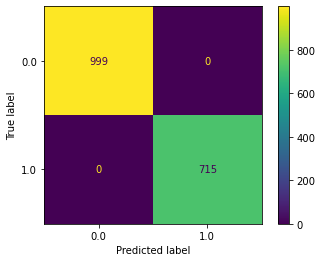

In [192]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nn_predict)

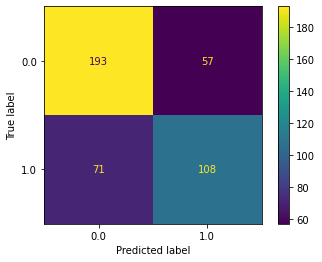

In [193]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nn_predict)

In [194]:
print('Precision:', precision_score(y_test, y_test_nn_predict))
print('Recall:', recall_score(y_test, y_test_nn_predict))
print('F1:', f1_score(y_test, y_test_nn_predict))

Precision: 0.6545454545454545
Recall: 0.6033519553072626
F1: 0.627906976744186


 <h4 align="left"> ■ Hidden_layer_sizes = (100, 100).</h4> 




In [195]:
nn = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [196]:
X_nn = nn.fit_transform(X_train)

In [197]:
NeuronalNetwork = MLPClassifier(hidden_layer_sizes = (100, 100))

In [198]:
NeuronalNetwork.fit(X_nn, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100))

In [199]:
y_train_nn_predict = NeuronalNetwork.predict(X_nn)
y_test_nn_predict = NeuronalNetwork.predict(nn.transform(X_test))

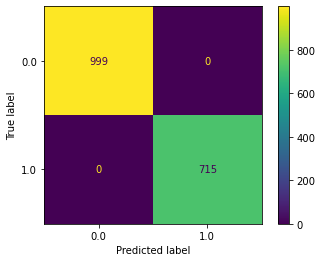

In [200]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nn_predict)

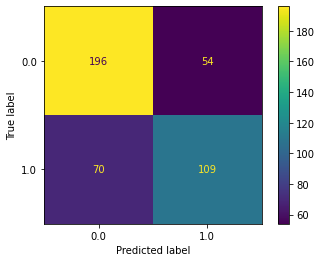

In [201]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nn_predict)

In [202]:
print('Precision:', precision_score(y_test, y_test_nn_predict))
print('Recall:', recall_score(y_test, y_test_nn_predict))
print('F1:', f1_score(y_test, y_test_nn_predict))

Precision: 0.6687116564417178
Recall: 0.6089385474860335
F1: 0.6374269005847953


 <h4 align="left"> ■ Hidden_layer_sizes = (100, 100, 100).</h4> 




In [203]:
nn = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [204]:
X_nn = nn.fit_transform(X_train)

In [205]:
NeuronalNetwork = MLPClassifier(hidden_layer_sizes = (100, 100, 100))

In [206]:
NeuronalNetwork.fit(X_nn, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100))

In [207]:
y_train_nn_predict = NeuronalNetwork.predict(X_nn)
y_test_nn_predict = NeuronalNetwork.predict(nn.transform(X_test))

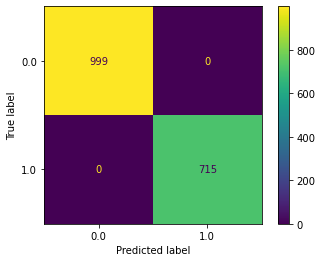

In [208]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nn_predict)

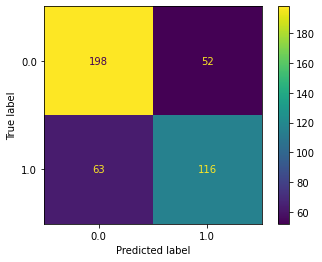

In [209]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nn_predict)

In [210]:
print('Precision:', precision_score(y_test, y_test_nn_predict))
print('Recall:', recall_score(y_test, y_test_nn_predict))
print('F1:', f1_score(y_test, y_test_nn_predict))

Precision: 0.6904761904761905
Recall: 0.6480446927374302
F1: 0.6685878962536023


 <h4 align="left"> ■ Hidden_layer_sizes = (200).</h4> 




In [211]:
nn = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [212]:
X_nn = nn.fit_transform(X_train)

In [213]:
NeuronalNetwork = MLPClassifier(hidden_layer_sizes = (200))

In [214]:
NeuronalNetwork.fit(X_nn, y_train)

MLPClassifier(hidden_layer_sizes=200)

In [215]:
y_train_nn_predict = NeuronalNetwork.predict(X_nn)
y_test_nn_predict = NeuronalNetwork.predict(nn.transform(X_test))

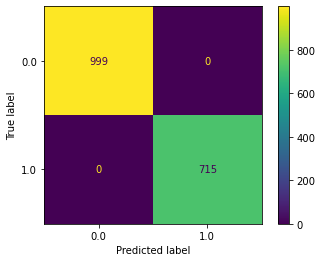

In [217]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nn_predict)

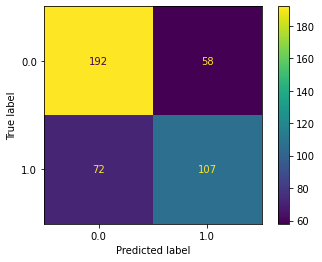

In [218]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nn_predict)

In [219]:
print('Precision:', precision_score(y_test, y_test_nn_predict))
print('Recall:', recall_score(y_test, y_test_nn_predict))
print('F1:', f1_score(y_test, y_test_nn_predict))

Precision: 0.6484848484848484
Recall: 0.5977653631284916
F1: 0.622093023255814


 <h4 align="left"> ■ Hidden_layer_sizes = (200, 200).</h4> 




In [220]:
nn = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [221]:
X_nn = nn.fit_transform(X_train)

In [222]:
NeuronalNetwork = MLPClassifier(hidden_layer_sizes = (200, 200))

In [223]:
NeuronalNetwork.fit(X_nn, y_train)

MLPClassifier(hidden_layer_sizes=(200, 200))

In [224]:
y_train_nn_predict = NeuronalNetwork.predict(X_nn)
y_test_nn_predict = NeuronalNetwork.predict(nn.transform(X_test))

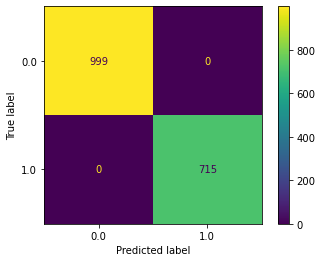

In [225]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nn_predict)

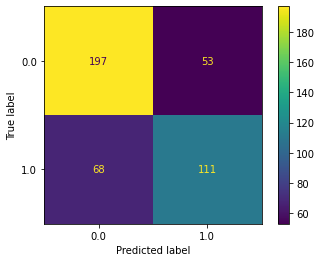

In [226]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nn_predict)

In [227]:
print('Precision:', precision_score(y_test, y_test_nn_predict))
print('Recall:', recall_score(y_test, y_test_nn_predict))
print('F1:', f1_score(y_test, y_test_nn_predict))

Precision: 0.676829268292683
Recall: 0.6201117318435754
F1: 0.6472303206997084


 <h4 align="left"> ■ Hidden_layer_sizes = (200, 200, 200).</h4> 




In [228]:
nn = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [229]:
X_nn = nn.fit_transform(X_train)

In [230]:
NeuronalNetwork = MLPClassifier(hidden_layer_sizes = (200, 200, 200))

In [231]:
NeuronalNetwork.fit(X_nn, y_train)

MLPClassifier(hidden_layer_sizes=(200, 200, 200))

In [232]:
y_train_nn_predict = NeuronalNetwork.predict(X_nn)
y_test_nn_predict = NeuronalNetwork.predict(nn.transform(X_test))

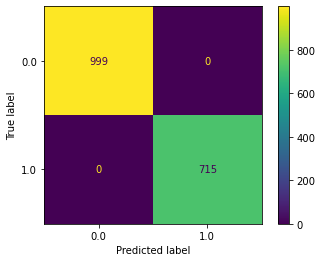

In [233]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_nn_predict)

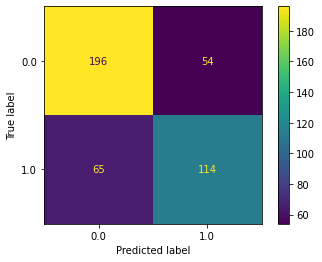

In [234]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_nn_predict)

In [235]:
print('Precision:', precision_score(y_test, y_test_nn_predict))
print('Recall:', recall_score(y_test, y_test_nn_predict))
print('F1:', f1_score(y_test, y_test_nn_predict))

Precision: 0.6785714285714286
Recall: 0.6368715083798883
F1: 0.6570605187319885
